In [1]:
!pip install pandas missingno numpy matplotlib seaborn scipy

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install missingno

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from scipy import stats
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


In [4]:
dataset = pd.read_csv('diabetes_prediction_dataset.csv')

In [5]:
dataset.shape

(100000, 9)

In [6]:
dataset.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [7]:
dataset.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               99998 non-null   object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [9]:
numerical_column = dataset.select_dtypes(include='number').columns
numerical_column.tolist()
numerical_column

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')

In [10]:
categorical_column = dataset.select_dtypes(exclude='number').columns
categorical_column.tolist()
categorical_column

Index(['gender', 'smoking_history'], dtype='object')

In [11]:
dataset.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [12]:
dataset.describe(include=["object", "bool"])

,gender,smoking_history
count,99998,100000
unique,3,6
top,Female,No Info
freq,58551,35816


<Axes: ylabel='Frequency'>

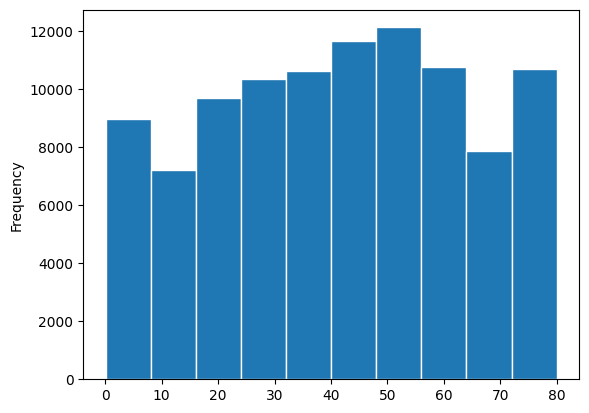

In [13]:
dataset['age'].plot(kind='hist', edgecolor='white')

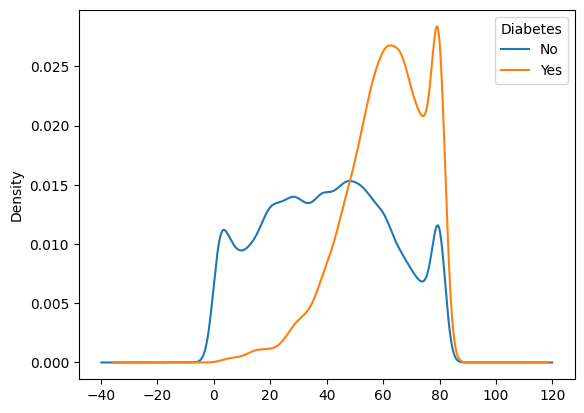

In [14]:
dataset.groupby('diabetes')['age'].plot(kind='kde')
plt.legend(['No', 'Yes'], loc='upper right', title='Diabetes')

<Axes: >

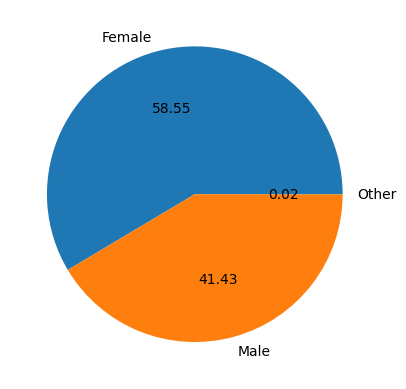

In [15]:
dataset.groupby('gender').size().plot(kind='pie', autopct='%.2f')

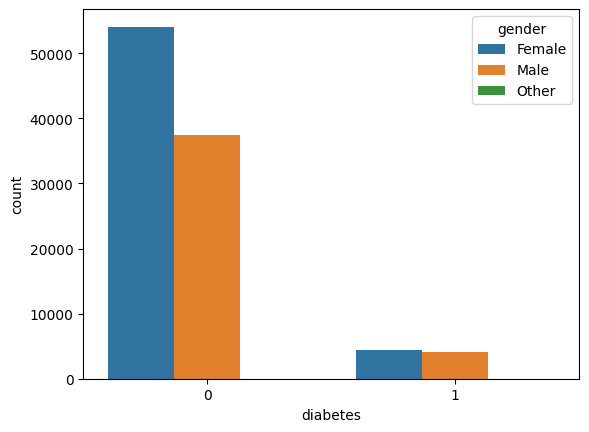

In [16]:
p = sns.countplot(data=dataset, x='diabetes', hue='gender')

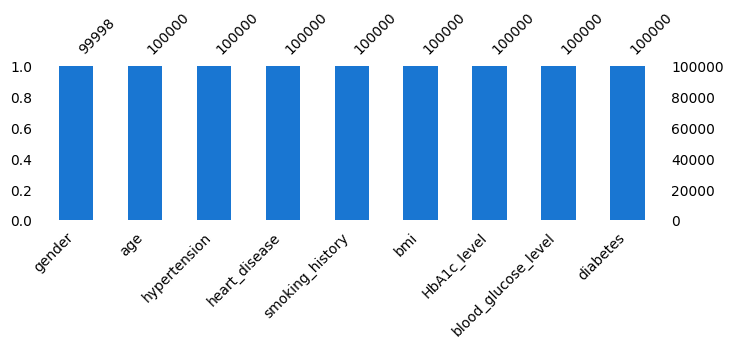

In [17]:
msno.bar(dataset, figsize = (8,2),color = "#1976D2", fontsize=10)
plt.show()

In [18]:
for column_name in dataset.columns:
 unique_values = len(dataset[column_name].unique())
 print('''Kolom '{column_name}' memiliki
 '{unique_values}' unique values'''.format(
 column_name=column_name,
 unique_values=unique_values)
 )

Kolom 'gender' memiliki
 '4' unique values
Kolom 'age' memiliki
 '102' unique values
Kolom 'hypertension' memiliki
 '2' unique values
Kolom 'heart_disease' memiliki
 '2' unique values
Kolom 'smoking_history' memiliki
 '6' unique values
Kolom 'bmi' memiliki
 '4247' unique values
Kolom 'HbA1c_level' memiliki
 '18' unique values
Kolom 'blood_glucose_level' memiliki
 '18' unique values
Kolom 'diabetes' memiliki
 '2' unique values


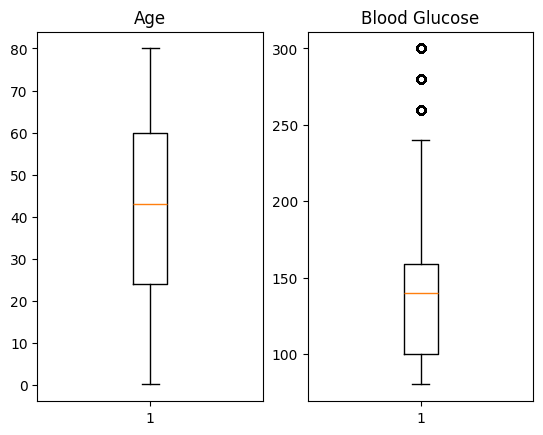

In [19]:
plt.subplot(1, 2, 1)
plt.title("Age")
plt.boxplot(dataset['age'])
plt.subplot(1, 2, 2)
plt.title("Blood Glucose")
plt.boxplot(dataset['blood_glucose_level'])

plt.show()

<Axes: >

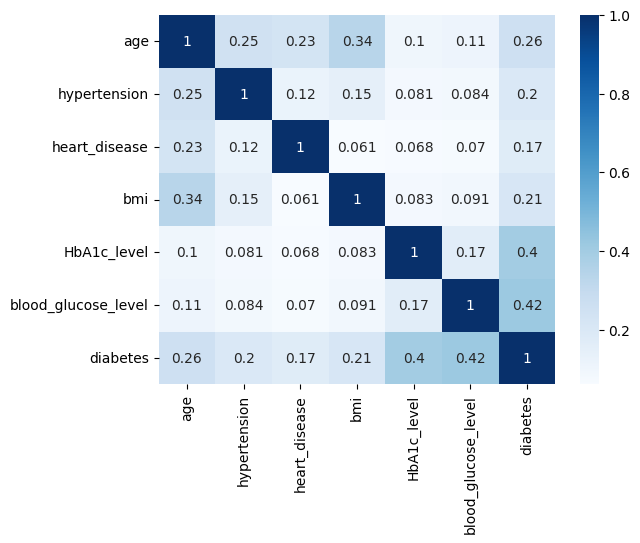

In [20]:
# calculate the correlation matrix on the numeric columns
corr = dataset.select_dtypes('number').corr()
# plot the heatmap
sns.heatmap(corr, cmap="Blues", annot=True)

DATA CLEANING DAN PREPROCESSING

In [21]:
dataset = pd.read_csv('diabetes_prediction_dataset_uncleaned.csv')

In [22]:
#mendapatkan missing value pada setiap kolom
missing_values_count = dataset.isnull().sum()

#cek missing value
missing_values_count

gender                 2
age                    3
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            3
blood_glucose_level    0
diabetes               0
dtype: int64

In [23]:
#cek shape untuk melihat jumlah row saat ini
dataset.shape

(100010, 9)

In [24]:
dataset.dropna(subset=['gender'], inplace=True)

In [25]:
#cek kembali missing value
missing_values_count = dataset.isnull().sum()

missing_values_count

gender                 0
age                    3
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            3
blood_glucose_level    0
diabetes               0
dtype: int64

In [26]:
#cek shape setelah dihapus
dataset.shape

(100008, 9)

In [27]:
dataset = dataset.fillna({
    'age': dataset['age'].median(),
    'HbA1c_level': dataset['age'].mean(),
})

In [28]:
#cek kembali missing value setelah dilakukan imputation
missing_values_count = dataset.isnull().sum()

missing_values_count

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [29]:
#cek unique values untuk melihat inconsistent data
#pada kolom smoking_history
smoking = dataset['smoking_history'].unique()

#urutkan secara alphabet
smoking.sort()
smoking

array(['No Info', 'NoInfo', 'Not Info', 'curent', 'current', 'ever',
       'former', 'never', 'noever', 'not current'], dtype=object)

In [30]:
%%capture

#install library fuzzywuzzy dan load library fuzzywuzzy
!pip install fuzzywuzzy

import fuzzywuzzy
from fuzzywuzzy import process 

In [31]:
#mendapatkan 10 kata terdekat dengan "No Info"
#pada kolom smoking_history
matches = fuzzywuzzy.process.extract(
    "No Info",
    smoking,
    limit=10,
    scorer=fuzzywuzzy.fuzz.token_sort_ratio)
matches

[('No Info', 100),
 ('Not Info', 93),
 ('NoInfo', 62),
 ('not current', 44),
 ('former', 31),
 ('noever', 31),
 ('never', 17),
 ('curent', 15),
 ('current', 14),
 ('ever', 0)]

In [32]:
#membuat fungsi untuk mengganti kata pada kolom tertentu
#pada dataframe berdasarkan rasio kemiripan

def replace_inconsistent_data(df, column, string_to_match, min_ratio=47):
    #dapatkan unique string
    strings = df[column].unique()

    #10 teratas unique string
    matches = fuzzywuzzy.process.extract(
    string_to_match,
    strings,
    limit=10,
    scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    #dapatkan kata dengan rasio kemiripan > 90
    close_matches = [
    matches[0] for matches in matches if matches[1] >= min_ratio
    ]

    #dapatkan rowws yang mirip pada kolom tertentu
    rows_with_matches = df[column].isin(close_matches)

    #replace dengan string_to_match
    df.loc[rows_with_matches, column] = string_to_match

    print("Penggantian data selesai!")

In [33]:
# mengganti kata yang mirip dengan "No Info" pada kolom smoking_history
replace_inconsistent_data(df=dataset,column='smoking_history',string_to_match="No Info")

Penggantian data selesai!


In [34]:
# cek kembali kata unik
smoking = dataset['smoking_history'].unique()
# urutkan secara alphabet
smoking.sort()
smoking

array(['No Info', 'curent', 'current', 'ever', 'former', 'never',
       'noever', 'not current'], dtype=object)

<Axes: >

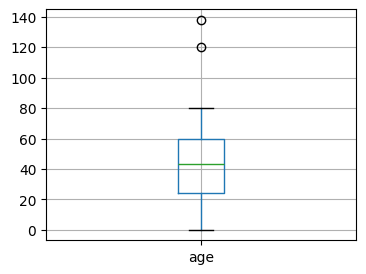

In [35]:
# melihat outlier dengan boxplot pada kolom age
plt.figure(figsize=(4,3))
dataset.boxplot(column='age')

In [36]:
# age dengan nilai diatas seratus akan diganti dengan
# nilai median semua data age
dataset.loc[dataset['age'] > 100, 'age'] = dataset['age'].mean()

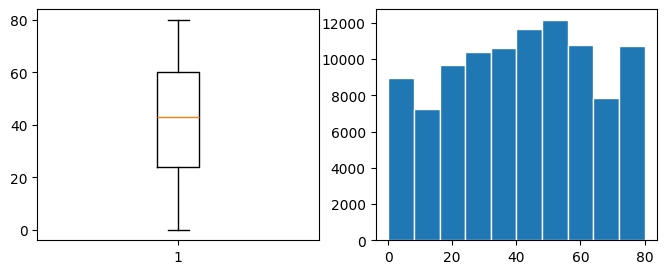

In [37]:
# cek kembali outlier dengan boxplot dan histogram plot pada kolom age
plt.figure(figsize=(8,3))
plt.subplot(1, 2, 1)
plt.boxplot(dataset['age'])
plt.subplot(1, 2, 2)
plt.hist(dataset['age'], edgecolor='white')
plt.show()

In [38]:
# cek duplicate rows
duplicate = dataset[dataset.duplicated()]
duplicate

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
2756,Male,80.0,0,0,No Info,27.32,6.6,159,0
3272,Female,80.0,0,0,No Info,27.32,3.5,80,0
3418,Female,19.0,0,0,No Info,27.32,6.5,100,0
3939,Female,78.0,1,0,former,27.32,3.5,130,0
3960,Male,47.0,0,0,No Info,27.32,6.0,200,0
...,...,...,...,...,...,...,...,...,...
100001,Female,55.0,0,0,never,35.42,6.5,140,0
100002,Female,55.0,0,0,never,35.42,6.5,140,0
100003,Female,55.0,0,0,never,35.42,6.5,140,0
100005,Female,13.0,0,0,No Info,31.31,5.0,126,0


In [39]:
dataset.drop_duplicates(inplace=True)

In [40]:
# cek kembali duplicate rows
duplicate = dataset[dataset.duplicated()]
duplicate

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes


In [41]:
# cek unique values pada gender
gender = dataset['gender'].unique()
gender

array(['Female', 'Male', 'Other'], dtype=object)

In [42]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [43]:
#import label encoder
from sklearn import preprocessing
# gunakan label encoder pada kolom gender
label_encoder = preprocessing.LabelEncoder()
dataset['gender'] = label_encoder.fit_transform(dataset['gender'])
dataset.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,No Info,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,0,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0


In [44]:
# menggunakan sklearn library untuk membagi menjadi train dan test
from sklearn.model_selection import train_test_split
# ukuran untuk data test adalah 20% (0,2) dari total data
train, test = train_test_split(dataset, test_size=0.2)

In [45]:
# cek jumlah train dan test data
train.shape

(76919, 9)

In [46]:
test.shape

(19230, 9)

KLASIFIKASI

In [47]:
dataset = pd.read_csv('diabetes_prediction_dataset.csv')

In [48]:
missing_values_count = dataset.isnull().sum()
missing_values_count

gender                 2
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [49]:
dataset.dropna(subset=['gender'], inplace=True)
missing_values_count = dataset.isnull().sum()
missing_values_count

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [50]:
dataset.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [51]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
dataset['gender'] = label_encoder.fit_transform(
    dataset['gender']
)
dataset['smoking_history'] = label_encoder.fit_transform(
    dataset['smoking_history']
)
dataset.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [52]:
X = dataset.iloc[:, :-1] #value kecuali kolom terakhir
y = dataset.iloc[:, -1] #label berada di kolom terakhir

In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=0)
print ('Training data: %d' % (X_train.shape[0]))
print ('Test data: %d' % (X_test.shape[0]))

Training data: 79998
Test data: 20000


In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#tentukan nilai K
K = 11

#klasifikasikan dengan KNN
knn = KNeighborsClassifier(n_neighbors=K).fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Accuracy pada data training set: {:.2f}'.format(
    knn.score(X_train, y_train)))
print('Accuracy pada test dibanding prediksi: {:.2f}'.format(
    accuracy_score(y_test, y_pred)))
print('F1-score pada test set: {:.2f}'.format(f1_score(y_test, y_pred)))

Accuracy pada data training set: 0.96
Accuracy pada test dibanding prediksi: 0.95
F1-score pada test set: 0.64


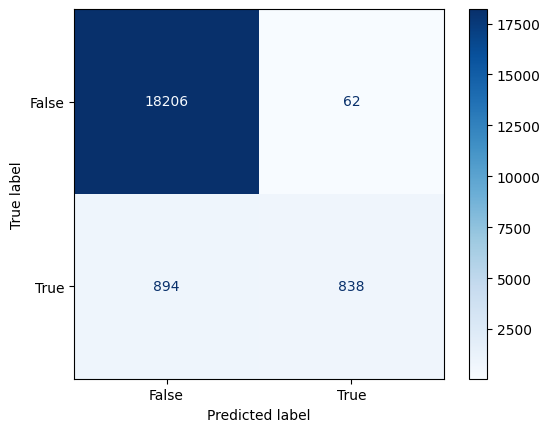

In [55]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix = confusion_matrix,
    display_labels = [False, True])
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

In [56]:
print(classification_report(y_test,
                            y_pred,labels=[False, True],
                            target_names=['Diabetes', 'No']))

              precision    recall  f1-score   support

    Diabetes       0.95      1.00      0.97     18268
          No       0.93      0.48      0.64      1732

    accuracy                           0.95     20000
   macro avg       0.94      0.74      0.81     20000
weighted avg       0.95      0.95      0.95     20000



In [57]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=4,
                              min_samples_leaf=1,
                              random_state=0).fit(X_train, y_train)
y_pred=tree.predict(X_test)

print("Accuracy on test: {:.3f}".format(accuracy_score(y_pred, y_test)))
print("F1-score on test set: {:.3f}".format(f1_score(y_pred, y_test)))

Accuracy on test: 0.972
F1-score on test set: 0.806


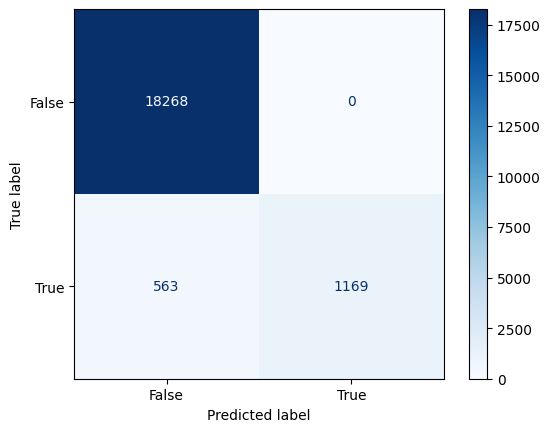

In [58]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix = confusion_matrix,
    display_labels = [False, True]
)
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

In [59]:
print(classification_report(y_test,
                            y_pred,
                            labels=[False, True],
                           target_names=['Diabetes', 'No']))

              precision    recall  f1-score   support

    Diabetes       0.97      1.00      0.98     18268
          No       1.00      0.67      0.81      1732

    accuracy                           0.97     20000
   macro avg       0.99      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000



In [60]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

#SVM membutuhkan feature scaling
# C = regularization parameter - parameter untuk 
# menghindarkan missclasification
# C semakin besar akan semakin lama waktu eksekusinya
#kernel = {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} 
svc = SVC(C=10, kernel='linear', gamma='auto').fit(
    X_train_scaled, y_train
)
y_pred=svc.predict(X_test_scaled)

print("Accuracy on train: {:.3f}".format(
    svc.score(X_train_scaled, y_train))
    )
print("Accuracy on test: {:.3f}".format(
    accuracy_score(y_pred, y_test))
    )
print("F1-score on test set: {:.3f}".format(
    f1_score(y_pred, y_test))
    )

Accuracy on train: 0.961
Accuracy on test: 0.960
F1-score on test set: 0.724


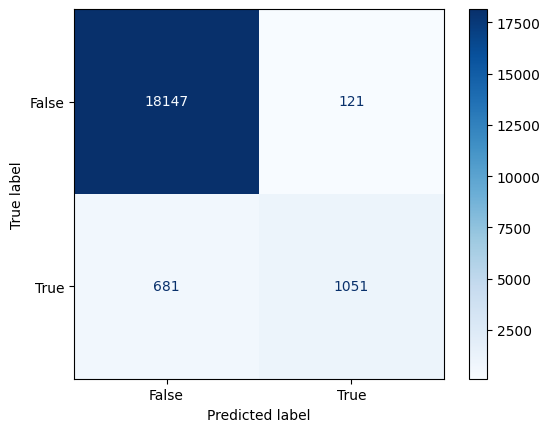

In [61]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix = confusion_matrix,
    display_labels = [False, True])
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

In [62]:
print(classification_report(y_test,
                            y_pred,
                            labels=[False, True],
                            target_names=['Diabetes', 'No']))

              precision    recall  f1-score   support

    Diabetes       0.96      0.99      0.98     18268
          No       0.90      0.61      0.72      1732

    accuracy                           0.96     20000
   macro avg       0.93      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000

